In [4]:
#python 3
%pylab inline

import numpy as np
#from matplotlib.pyplot import plot,scatter,savefig,figure,colorbar,suptitle,close,show,subplot,rgrids, contourf, contour
from matplotlib.mlab import csv2rec
import matplotlib.pyplot as plt
import datetime 
from operator import *
from matplotlib.dates import DateFormatter
import pickle # works for python 3.x and optimizes speed (works in Python 2.x also, but is relatively slow)
import pandas as pd
from pprint import pprint

Populating the interactive namespace from numpy and matplotlib


/Users/Eren/anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['mod', 'add', 'inv', 'matmul', 'invert']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
A=pd.read_pickle('/Users/Eren/Desktop/data/HOBO/HOBOdata.p')
df=pd.DataFrame(A)   # use sensorID as column heads
df.head()

,RH,T,dt
32,"[74.9208668514, 74.9390485727, 74.9279375208, ...","[23.8824626467, 23.9749983232, 24.0675339998, ...","[2012-05-07 17:00:00, 2012-05-07 17:15:00, 201..."
33,"[53.6421923707, 53.9179484769, 54.1563310449, ...","[20.2955127109, 20.4548267107, 20.3632450102, ...","[2012-02-03 21:15:00, 2012-02-03 21:30:00, 201..."
34,"[30.8544350231, 30.9190811432, 31.7281677405, ...","[24.990982813, 25.3391840701, 25.5948496506, 2...","[2012-05-07 17:00:00, 2012-05-07 17:15:00, 201..."
35,"[54.3209766321, 53.8331004442, 54.2926939545, ...","[20.4090358604, 20.52255901, 20.4319312856, 20...","[2012-02-03 20:45:00, 2012-02-03 21:00:00, 201..."
36,"[98.9722538285, 99.0813441562, 99.0136677492, ...","[8.24393331216, 8.363180318, 7.95774049813, 8....","[2012-02-07 12:00:00, 2012-02-07 12:15:00, 201..."


In [6]:
df.dtypes

RH    object
T     object
dt    object
dtype: object

In [7]:
print (df.columns)

Index(['RH', 'T', 'dt'], dtype='object')


In [8]:
#learn df.ix command: see what this does
df.ix[:,1]

32     [23.8824626467, 23.9749983232, 24.0675339998, ...
33     [20.2955127109, 20.4548267107, 20.3632450102, ...
34     [24.990982813, 25.3391840701, 25.5948496506, 2...
35     [20.4090358604, 20.52255901, 20.4319312856, 20...
36     [8.24393331216, 8.363180318, 7.95774049813, 8....
37     [24.9680873879, 25.2924392438, 25.5252093992, ...
38     [23.9749983232, 24.459618155, 24.644689508, 24...
39     [23.6525544194, 23.7221946708, 23.8137763713, ...
40     [8.02928870164, 8.00543930047, 8.07698750398, ...
41     [20.3403495851, 20.2497218606, 20.1590941362, ...
42     [23.8137763713, 23.8824626467, 23.9978937483, ...
43     [8.17238510865, 8.05313810281, 8.10083690515, ...
44     [7.93389109696, 7.95774049813, 7.9815898993, 8...
45     [8.05313810281, 8.05313810281, 8.14853570748, ...
46     [24.2516513768, 24.4128733287, 24.5521538315, ...
47     [20.1133032859, 20.0684664117, 19.9997801364, ...
48     [24.7830160348, 25.0844724656, 25.2924392438, ...
49     [20.52255901, 20.3403495

In [16]:
#pick out a single sensor
df.ix[:,1][0]

array([ 23.88246265,  23.97499832,  24.067534  , ...,  30.26360842,
        30.38476338,  30.06995129])

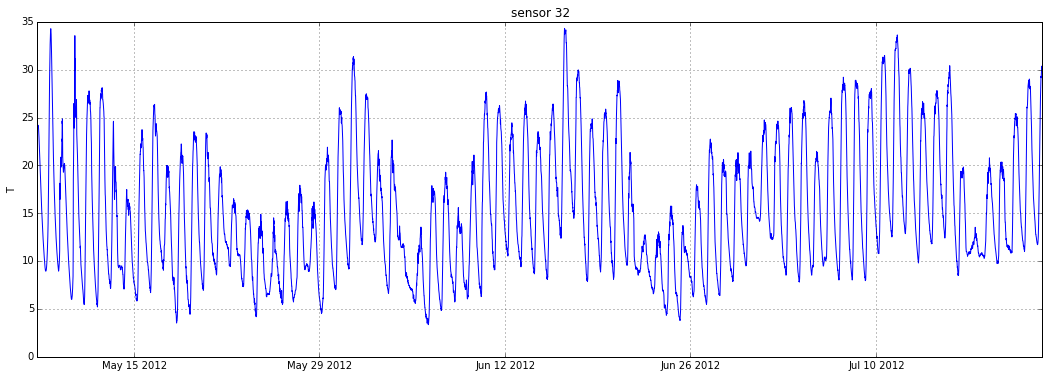

In [15]:
#Plot for a single sensor
fig = plt.figure(figsize=(18,6)) 
plt.plot(df.ix[:,2][0], df.ix[:,1][0])
plt.title('sensor 32')
plt.ylabel(df.columns[1])
plt.grid()

In [11]:
#get start date of sensor 32 
df.ix[:,2][0][0]
#May 7 17:00

7282

In [12]:
#get length of sensor 32 deployment:
len(df.ix[:,2][0])

7282

In [14]:
#get last date of sensor 32
df.ix[:,2][0][7281] #one less than length because counting starts at 0
#July 22 at 13:15

datetime.datetime(2012, 7, 22, 13, 15)

In [16]:
#Figuring out which functions to use: Try averaging T for entire sensor 32 deployment:
Av32T=np.mean(df.ix[:,1][0])
print(Av32T)

15.2816746534


In [17]:
#Figuring out which functions to use: Try to get the anomaly (departure from mean) for the sensor 32 deployment 
An32T=df.ix[:,1][0]-np.mean(df.ix[:,1][0])
print(An32T)

[  8.60078799   8.69332367   8.78585935 ...,  14.98193377  15.10308873
  14.78827663]


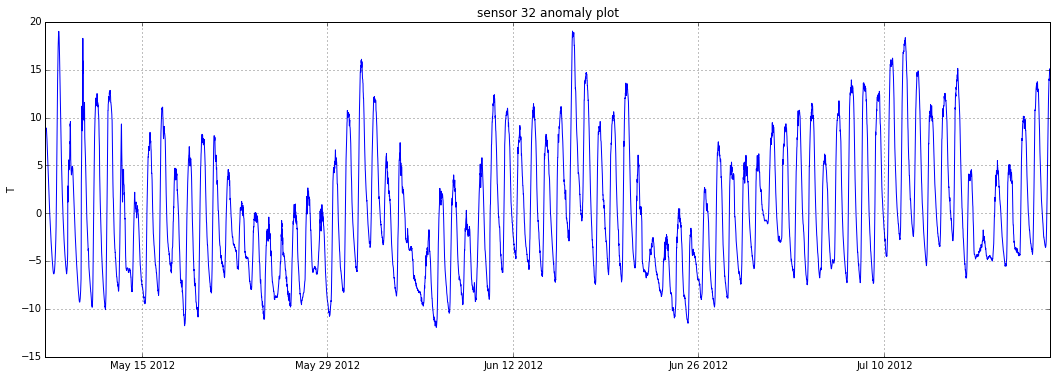

In [18]:
#plot the anomaly for sensor 32 to make sure it looks as we expect: everything should be shifted down by 15.28 degrees
fig = plt.figure(figsize=(18,6)) 
plt.plot(df.ix[:,2][0], An32T)
plt.title('sensor 32 anomaly plot')
plt.ylabel(df.columns[1])
plt.grid()
#looks good

In [22]:
#Now we need to group by hour. That means every 4 elements because these are 15-minute samples,
#and for convenience start with 00:00. Also, from previous analyses we know to start looking 
#at May 11. So find index of May 11 00:00:
df.ix[:,2][0][316]


datetime.datetime(2012, 5, 11, 0, 0)

In [24]:
#Make a new sensor 32 T string: 
T32=df.ix[:,1][0][316:7281]
len(T32)

6965

In [73]:
#delete the last value to make it divisible by 4: 
T32=df.ix[:,1][0][316:7280]
#And do the same for RH from sensor 32 (leaving out DT for now)
RH32=df.ix[:,0][0][316:7280]
len(T32)

6964

In [74]:
#now we want to reshape so that every 4 elements go onto their own row
HourShapeT32=T32.reshape(1741,4)
HourShapeRH32=RH32.reshape(1741,4)
#HourShapeDT32=DT32.reshape(1741,4)
print(HourShapeT32)
#Note, Inez points out that this approach fails in the case of a missing value. Her way is better, which is to start
#off by totally reshaping the entire dataframe. We will do that later.

[[  9.45357494   9.38202674   9.14639465   8.86210979]
 [  8.64841916   8.41087912   8.14853571   8.0769875 ]
 [  7.83753952   7.59809153   7.47789055   7.33288619]
 ..., 
 [ 24.11332485  25.57195423  26.13098419  27.13838289]
 [ 27.82238372  28.46345562  28.86889544  29.32298804]
 [ 29.17989163  29.5156912   30.09380069  30.26360842]]


In [108]:
#For T & RH, we want to get the mean of every entry. 
#Axis=1 means it will take mean across rows, not columns. 0 for columns if desired. 
HourlyMeanT32=numpy.mean(HourShapeT32, axis=1) 
HourlyMeanRH32=numpy.mean(HourShapeRH32, axis=1)
#For datetime, we just want to take the first datetime stamp (as averaging doesn't make sense)
HourlyDT32=DT32[::4] #This command takes every fourth value starting with the first one.

In [78]:
#Make sure this did what was desired:
print(HourlyDT32)

[datetime.datetime(2012, 5, 11, 0, 0) datetime.datetime(2012, 5, 11, 1, 0)
 datetime.datetime(2012, 5, 11, 2, 0) ...,
 datetime.datetime(2012, 7, 22, 10, 0)
 datetime.datetime(2012, 7, 22, 11, 0)
 datetime.datetime(2012, 7, 22, 12, 0)]


In [83]:
print(HourlyMeanT32)

[  9.21102653   8.32120537   7.56160194 ...,  25.73866154  28.61943071
  29.76324799]


In [109]:
#Make sure all are same shape:
shape(HourlyDT32)

(1741,)

In [80]:
shape(HourlyMeanT32)

(1741,)

In [81]:
shape(HourlyMeanRH32)

(1741,)

In [119]:
#Now, we want to group these by day. That means every 24 entries belong to a day. We'll
#us the trick of reshaping again. 
#First, 1741 is not divisible by 24, but 1728 is. So we'll delete the 13 last entries for each:
TrimHourlyDT32=HourlyDT32[0:1728]
TrimHourlyMeanT32=HourlyMeanT32[0:1728]
TrimHourlyMeanRH32=HourlyMeanRH32[0:1728]
#Now, group by 24:
DayShapeT32=TrimHourlyMeanT32.reshape(72,24)
DayShapeRH32=TrimHourlyMeanRH32.reshape(72,24)
#Make sure it looks okay: 
print(DayShapeT32[0][0:24])

[  9.21102653   8.32120537   7.56160194   6.92291498   6.10225709
   5.55085893   6.31451676  10.19052144  15.2897619   21.10996976
  24.1951283   26.13790052  26.96857516  26.83334905  27.31510696
  26.8273867   26.38808073  25.37996655  23.13693037  19.02410113
  16.1581186   14.03194448  12.01356966  10.37416182]


In [120]:
#compare to previous format of data to make sure nothing happened while reshaping and trimming:
print(HourlyMeanT32[0:24])
#looks good. 

[  9.21102653   8.32120537   7.56160194   6.92291498   6.10225709
   5.55085893   6.31451676  10.19052144  15.2897619   21.10996976
  24.1951283   26.13790052  26.96857516  26.83334905  27.31510696
  26.8273867   26.38808073  25.37996655  23.13693037  19.02410113
  16.1581186   14.03194448  12.01356966  10.37416182]


In [123]:
#Now, average each hour of the day across all days (i.e. columnwise, so "axis=0"):
HourlyClimateT32=numpy.mean(DayShapeT32,axis=0)
HourlyClimateRH32=numpy.mean(DayShapeRH32,axis=0)
#Instead of datetime, for this just make a vector 0-23
Hour=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
#check looks okay
print(HourlyClimateT32)


[ 10.68735746  10.09162923   9.58063594   9.08583042   8.65949919
   8.44451671   9.13698408  11.39085186  14.83864385  18.24144991
  20.38232453  21.35442281  21.70881166  21.82009893  21.80699832
  21.38273735  20.8063967   19.70831727  18.19267126  16.09542448
  14.3880856   13.11939683  12.17236692  11.4405613 ]


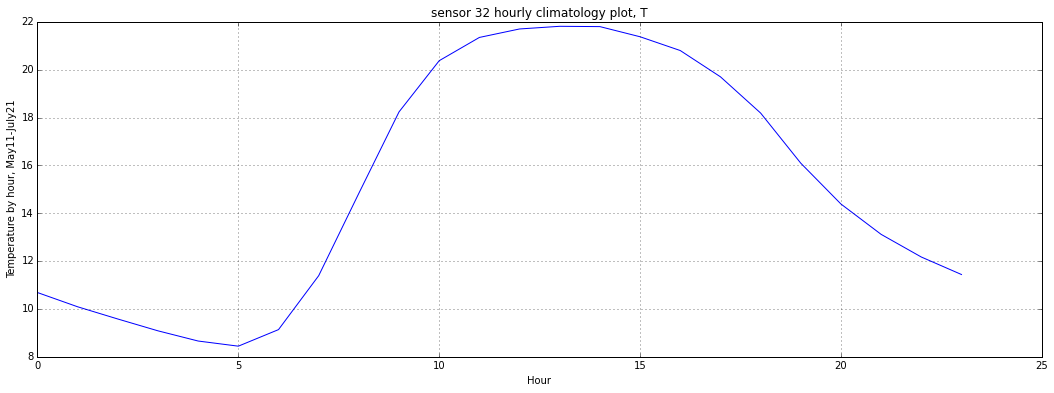

In [124]:
#look at T climatology in a plot:
fig = plt.figure(figsize=(18,6)) 
plt.plot(Hour, HourlyClimateT32)
plt.title('sensor 32 hourly climatology plot, T')
plt.ylabel('Temperature by hour, May11-July21')
plt.xlabel('Hour')
plt.grid()

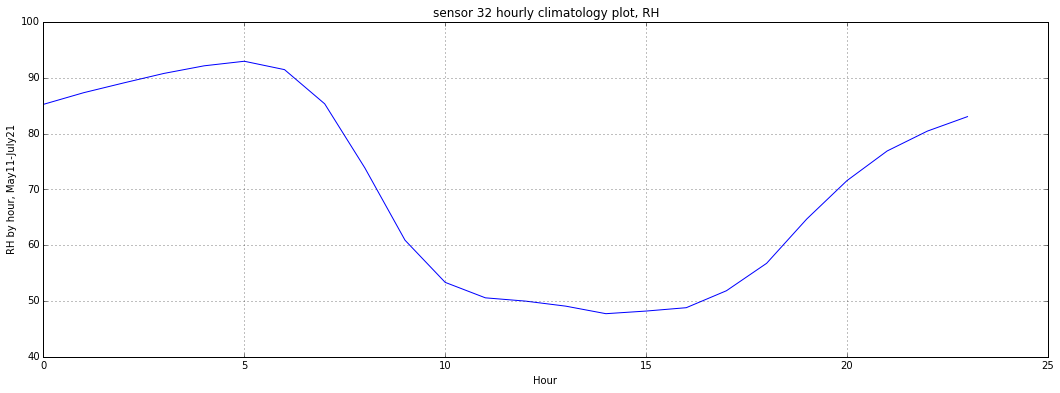

In [125]:
#look at RH climatology:
fig = plt.figure(figsize=(18,6)) 
plt.plot(Hour, HourlyClimateRH32)
plt.title('sensor 32 hourly climatology plot, RH')
plt.ylabel('RH by hour, May11-July21')
plt.xlabel('Hour')
plt.grid()

In [137]:
#Do the same for sensor 45: what is the start date
df.ix[:,2][13]
#Feb 7

array([datetime.datetime(2012, 2, 7, 12, 15),
       datetime.datetime(2012, 2, 7, 12, 30),
       datetime.datetime(2012, 2, 7, 12, 45), ...,
       datetime.datetime(2012, 9, 15, 9, 30),
       datetime.datetime(2012, 9, 15, 9, 45),
       datetime.datetime(2012, 9, 15, 10, 0)], dtype=object)

In [138]:
#What is the end date
len(df.ix[:,2][13])

21206

In [141]:
#what is the end date
df.ix[:,2][13][21205]
#Sep 15

datetime.datetime(2012, 9, 15, 10, 0)

In [148]:
#Find May 11 00:00
df.ix[:,2][13][8973]

datetime.datetime(2012, 5, 11, 0, 0)

In [160]:
#Find July 21 23:45
df.ix[:,2][13][15884]

datetime.datetime(2012, 7, 21, 23, 45)

In [165]:
#Make a trimmed version: 
DT45=df.ix[:,2][13][8973:15885]
T45=df.ix[:,1][13][8973:15885]
RH45=df.ix[:,0][13][8973:15885]
#Check it's the right length:
len(DT45)

6912

In [167]:
#group by hour (every 4 meansurements)
HourShapeT45=T45.reshape(1728,4)
HourShapeRH45=RH45.reshape(1728,4)
#Average over the hour
HourlyMeanT45=numpy.mean(HourShapeT45, axis=1) 
HourlyMeanRH45=numpy.mean(HourShapeRH45, axis=1)
HourlyDT45=DT45[::4]
#Now group by day
DayShapeT45=HourlyMeanT45.reshape(72,24)
DayShapeRH45=HourlyMeanRH45.reshape(72,24)
#Now average over hours of the day to get climatology for each hour
HourlyClimateT45=numpy.mean(DayShapeT45,axis=0)
HourlyClimateRH45=numpy.mean(DayShapeRH45,axis=0)
#Instead of datetime, for this just make a vector 0-23
Hour=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]

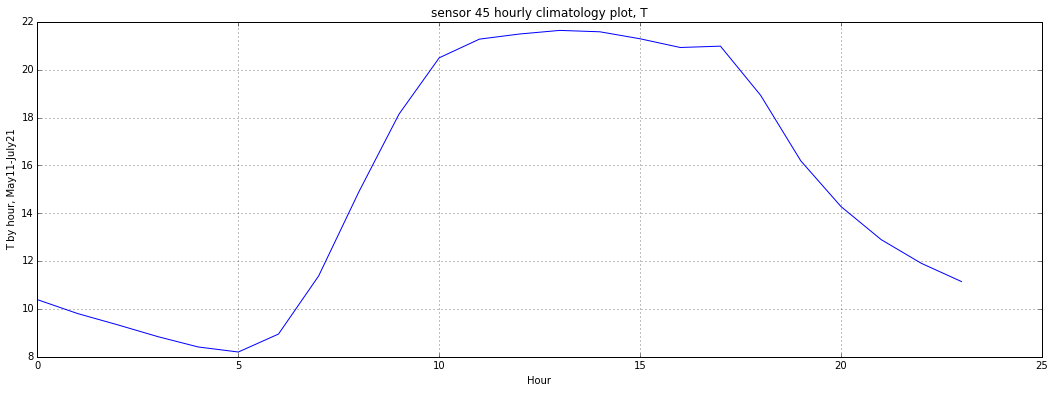

In [170]:
#Now make a plot
fig = plt.figure(figsize=(18,6)) 
plt.plot(Hour, HourlyClimateT45)
plt.title('sensor 45 hourly climatology plot, T')
plt.ylabel('T by hour, May11-July21')
plt.xlabel('Hour')
plt.grid()

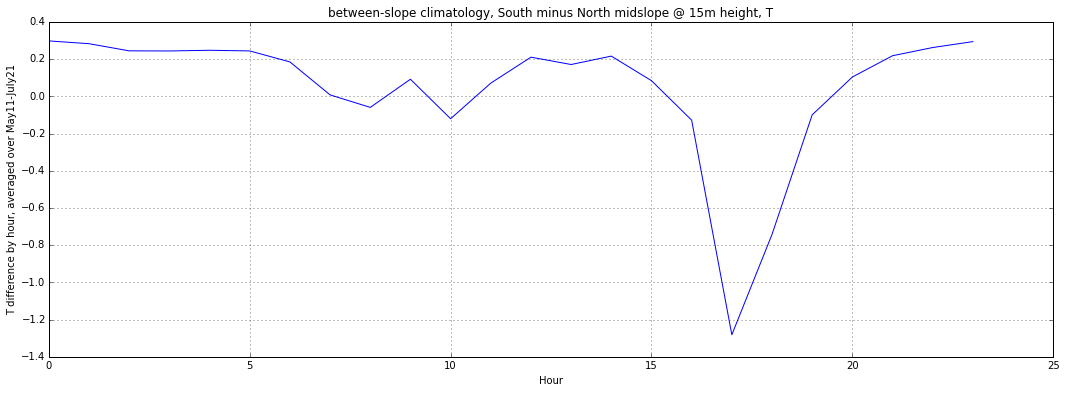

In [173]:
#Plot difference
fig = plt.figure(figsize=(18,6)) 
plt.plot(Hour, HourlyClimateT32-HourlyClimateT45)
plt.title('between-slope climatology, South minus North midslope @ 15m height, T')
plt.ylabel('T difference by hour, averaged over May11-July21')
plt.xlabel('Hour')
plt.grid()

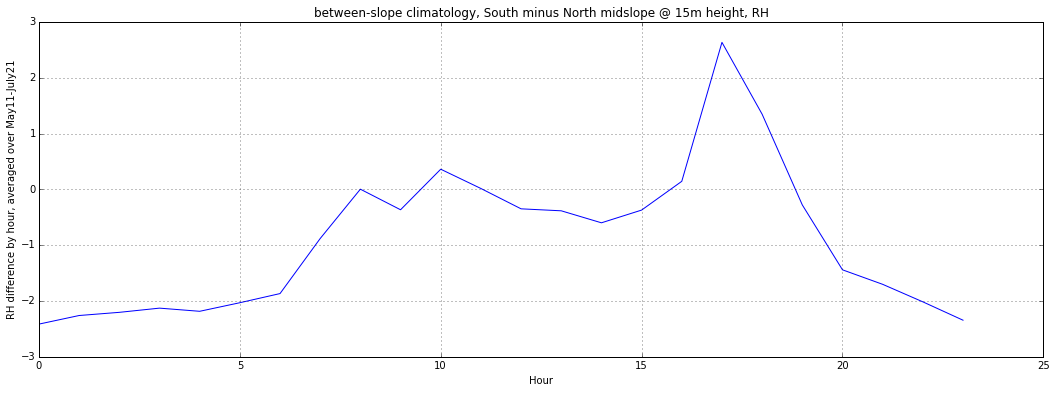

In [174]:
#Plot difference
fig = plt.figure(figsize=(18,6)) 
plt.plot(Hour, HourlyClimateRH32-HourlyClimateRH45)
plt.title('between-slope climatology, South minus North midslope @ 15m height, RH')
plt.ylabel('RH difference by hour, averaged over May11-July21')
plt.xlabel('Hour')
plt.grid()

In [177]:
DayShapeT45[0]

array([  8.72545272,   7.71113769,   6.97729162,   6.33431176,
         5.51985471,   5.12514712,   5.76884246,   9.3915665 ,
        14.75935122,  21.40761029,  24.26357608,  25.81068673,
        26.63349107,  26.58102239,  26.74534476,  26.76275483,
        26.44627327,  27.22996459,  23.3229557 ,  17.80992812,
        14.8714434 ,  12.7288132 ,  10.95775667,   9.5468261 ])

In [178]:
DayShapeT45[13]

array([  6.29758368,   5.61811424,   4.9827662 ,   4.52915059,
         4.14135932,   3.87806193,   4.73210899,   8.20553578,
        11.19076532,  12.38919773,  13.08011488,  12.99449553,
        12.93701847,  13.52275977,  13.71117004,  12.94846619,
        12.97732396,  13.11302705,  11.28759389,   9.11062055,
         8.33336857,   7.96918821,   7.4836144 ,   6.95248824])

In [132]:
#Now, next we want to put all the steps we've learned into a big for-loop so we can get 
#climatology for all sensors. There is one snag: the sensors are not all deployed for the same 
#amount of time. See: 
for ss in range(0,46):
    print(len(df.ix[:,2][ss]))


7282
21552
12562
21553
21207
12563
12562
7281
21207
21552
7281
21206
21206
21206
7281
21553
12562
21553
12561
12561
21206
7281
12552
21571
12566
12552
12562
12562
12551
12551
7282
12388
7282
12563
46369
46363
46367
46368
46366
46370
46366
46365
46369
46367
46366
46367


In [ ]:
#To do this i will just start afresh, starting from Jiabin's processing code, with my own comments added: 
df2=pd.DataFrame(A).transpose()
df2.head()

In [237]:
#Now use a dictionary to organize the contents of this dataframe (df2):
#this dictionary has sensor IDs as keys, and (treename,tree specifications) as values
#for example, IDsensor['798']=('Kevin,'1-1')
IDsensor={'798':('Kevin','1-1'), '807':('Kevin','1-2'), '795':('Kevin','1-3'),  '800':('Kevin','1-4'), 
           '797':('Kevin','2-1'), '810':('Kevin','2-2'), '810':('Kevin','2-3'),  '796':('Kevin','2-4'),
           '799':('S','-1'),      '808':('S','-2'), '803':('S','-3'), '809':('S','-4'),
           '40':('ILean','30m'),  '52':('ILean','25m'), '44':('ILean','20m'),
           '45':('ILean','15m'),  '43':('ILean','10m'), '36':('ILean', '5m'),
           '47':('FT','28m'),     '56':('FT','22m'),  '35':('FT','17m'),
           '41':('FT','12m'), '33':('FT','7m'), '49':('FT','2m'),
           '62':('Ursula','25m'), '58':('Ursula','20m'), '54':('Ursula','15m'),
           '61':('Ursula','10m'), '42':('Ursula','5m'),
           '59':('SMM','17.5m'),'32':('SMM', '15m'), '60':('SMM', '10m'), '48':('SMM','5m'),
           '34':('SMM', '2.5m'), '63':('SMU', '17.5m'),'37':('SMU','15m'),'66':('SMU','10m'),
           '65':('SMU', '7.5m'), '64':('SMU','5m'),
           '39':('Freddie','12m'), '46':('Freddie', '6m'),
           '38':('road between well 6 and well 5','N/A'),
           '57':('near well 15, top of ridge','N/A')}

In [238]:
#write a function to extract the number from a string, so that we can sort the sensors for a tree by its height
import re
def extract_number(s):
    return re.match(r'(-?\d+(\.\d+)?)', s).group(0)
#example:
extract_number('7.5m')

'7.5'

In [239]:
#this function takes the name of a tree, e.g. 'Kevin', and return a list of sensor IDs that measure Kevin. 
def get_tree_sensorIDs(input_treename):
    tree_numbers=[]
    for sensornumber,(treename,treespecs) in IDsensor.items():
        if treename==input_treename:
            tree_numbers.append(sensornumber)
    return tree_numbers
    #tree_numbers_sorted=sorted(tree_numbers) #sort the ID numbers in order. not sure whether useful. 
    #return tree_numbers_sorted
#try this example
get_tree_sensorIDs('Ursula')

['54', '42', '62', '61', '58']

In [243]:
#this function takes the name of a tree, e.g. 'Kevin', and return a list of sensor IDs that measure Kevin.
#the sensor numbers are ordered by height. should use this function if the order of height matters. 
def get_tree_sensorIDs_by_height(input_treename):
    tree_numbers_specs={}
    tree_numbers=[]
    for sensornumber,(treename,treespecs) in IDsensor.items():
        if treename==input_treename: 
            tree_numbers_specs[sensornumber]=float(extract_number(treespecs))
    sorted_by_height=sorted(tree_numbers_specs.items(), key=lambda x: x[1])
    ID_sorted_by_height=[item[0] for item in sorted_by_height]
    return ID_sorted_by_height
#try this example
get_tree_sensorIDs('Ursula')
#note the different in results from the last cell

['54', '42', '62', '61', '58']

In [241]:
#this function grabs the whole dataset corresponding to one specific tree
def get_tree_table(input_treename):
    df2new=df2[get_tree_sensorIDs_by_height(input_treename)]
    #dfnew.columns=[IDsensor[x] for x in list(dfnew.columns.values)]
    return df2new

In [242]:
#example
dfUrsula=get_tree_table('Ursula')
dfUrsula.head()

,42,61,54,58,62
RH,"[74.8168270018, 74.8016755674, 74.7067265784, ...","[32.3907904719, 32.8524041735, 33.3837144734, ...","[37.3523801923, 37.4958137713, 38.1493456421, ...","[34.7412829962, 34.5180518626, 34.9725948948, ...","[33.2402808943, 34.0008829015, 34.4251230649, ..."
T,"[23.8137763713, 23.8824626467, 23.9978937483, ...","[24.6208401069, 24.8288068851, 25.0606230644, ...","[24.2287559517, 24.3212916282, 24.4825135801, ...","[24.3670824784, 24.5054090052, 24.6675849332, ...","[24.2516513768, 24.4128733287, 24.5979446817, ..."
dt,"[2012-05-07 17:00:00, 2012-05-07 17:15:00, 201...","[2012-05-07 17:00:00, 2012-05-07 17:15:00, 201...","[2012-05-07 17:00:00, 2012-05-07 17:15:00, 201...","[2012-05-07 17:00:00, 2012-05-07 17:15:00, 201...","[2012-05-07 17:00:00, 2012-05-07 17:15:00, 201..."


In [245]:
#if you want to know what sensors the column names correspond to:
#note the columns are not sorted based on its height; they are sorted by their sensor ID numbers
column_ID_names=[IDsensor[x] for x in list(dfUrsula.columns.values)]
print (column_ID_names)
#note the columns are ordered from low to high in sensor height

[('Ursula', '5m'), ('Ursula', '10m'), ('Ursula', '15m'), ('Ursula', '20m'), ('Ursula', '25m')]


In [246]:
#not all time series have the same length, and we solve this problem here
#this function takes in a tree name, and gives all data about this tree, that span the same time range. 
#if one sensor has a shorter time period of records, then all data from other sensors will also be within this period. 
#this is to deal with the time truncation
from operator import *
def truncated_tree(tree):
    table=get_tree_table(tree)
    timestamp=table.ix['dt']
    startdate=max(timestamp.apply(itemgetter(0)))
    enddate=min(timestamp.apply(itemgetter(-1)))
    #column_no=len(table.columns)
    def mask_by_range(column):
        #print column
        #print column.ix['dt']
        timemask=(column.ix['dt']>=startdate) & (column.ix['dt']<=enddate)
        return column.apply(itemgetter(timemask))
    return table.apply(mask_by_range)

In [248]:
#example: see how the time-truncated tree data A differs from the original tree data B
A=truncated_tree('Ursula')
B=get_tree_table('Ursula')
print (A.applymap(np.shape))#this shows the size of arrays in each cell in the dataframe
print (B.applymap(np.shape))

         42       61       54       58       62
RH  (7281,)  (7281,)  (7281,)  (7281,)  (7281,)
T   (7281,)  (7281,)  (7281,)  (7281,)  (7281,)
dt  (7281,)  (7281,)  (7281,)  (7281,)  (7281,)
         42        61        54        58        62
RH  (7281,)  (12551,)  (12552,)  (12552,)  (12551,)
T   (7281,)  (12551,)  (12552,)  (12552,)  (12551,)
dt  (7281,)  (12551,)  (12552,)  (12552,)  (12551,)


In [ ]:
print(A.dt)

In [253]:
print (df2.applymap(np.shape))

         32        33        34        35        36        37        38  \
RH  (7282,)  (21552,)  (12562,)  (21553,)  (21207,)  (12563,)  (12562,)   
T   (7282,)  (21552,)  (12562,)  (21553,)  (21207,)  (12563,)  (12562,)   
dt  (7282,)  (21552,)  (12562,)  (21553,)  (21207,)  (12563,)  (12562,)   

         39        40        41    ...          797       798       799  \
RH  (7281,)  (21207,)  (21552,)    ...     (46367,)  (46368,)  (46366,)   
T   (7281,)  (21207,)  (21552,)    ...     (46367,)  (46368,)  (46366,)   
dt  (7281,)  (21207,)  (21552,)    ...     (46367,)  (46368,)  (46366,)   

         800       803       804       807       808       809       810  
RH  (46370,)  (46366,)  (46365,)  (46369,)  (46367,)  (46366,)  (46367,)  
T   (46370,)  (46366,)  (46365,)  (46369,)  (46367,)  (46366,)  (46367,)  
dt  (46370,)  (46366,)  (46365,)  (46369,)  (46367,)  (46366,)  (46367,)  

[3 rows x 46 columns]


In [226]:
len(df)

46

In [228]:
T = df.ix[:,1][0]
RH = df.ix[:,0][0]
dt = df.ix[:,2][0]
ids =  0*np.ones_like(T)
d = {'T': T, 'RH': RH, 'dt':dt, 'id':ids}
df2 = pd.DataFrame.from_dict(d)

for i in range(1,len(df)):
    T = df.ix[:,1][i]
    RH = df.ix[:,0][i]
    dt = df.ix[:,2][i]
    ids =  k[i]*np.ones_like(T)
    d = {'T': T, 'RH': RH, 'dt':dt, 'id':ids}
    tmp = pd.DataFrame.from_dict(d)
    #add tmp df to df2
    df2 = df2.append(tmp)

In [231]:
df2[df2.id==45]

,RH,T,dt,id
0,99.837131,5.149691,2010-01-23 12:13:53,45
1,99.837131,5.639298,2010-01-23 12:43:53,45
2,99.837131,6.076920,2010-01-23 13:13:53,45
3,99.837131,6.800934,2010-01-23 13:43:53,45
4,99.837131,6.752730,2010-01-23 14:13:53,45
5,99.837131,6.849139,2010-01-23 14:43:53,45
6,99.837131,7.064642,2010-01-23 15:13:53,45
7,99.837131,7.136476,2010-01-23 15:43:53,45
8,99.837131,6.656321,2010-01-23 16:13:53,45
9,99.837131,6.656321,2010-01-23 16:43:53,45


In [217]:
ids =  32*np.ones_like(T)
ids

array([ 32.,  32.,  32., ...,  32.,  32.,  32.])

In [219]:
df32

,RH,T,dt,id
0,74.920867,23.882463,2012-05-07 17:00:00,32
1,74.939049,23.974998,2012-05-07 17:15:00,32
2,74.927938,24.067534,2012-05-07 17:30:00,32
3,74.798645,24.159116,2012-05-07 17:45:00,32
4,74.362284,24.205861,2012-05-07 18:00:00,32
5,73.737035,24.205861,2012-05-07 18:15:00,32
6,73.070372,24.159116,2012-05-07 18:30:00,32
7,72.325931,24.020789,2012-05-07 18:45:00,32
8,71.540077,23.836672,2012-05-07 19:00:00,32
9,70.623920,23.606764,2012-05-07 19:15:00,32


In [215]:
df32[(df32.dt >= datetime.datetime(2012,5,11,0,0)) & (df32.dt <= datetime.datetime(2012,7,21,11,45))]

,RH,T,dt
316,74.069356,9.453575,2012-05-11 00:00:00
317,73.688550,9.382027,2012-05-11 00:15:00
318,76.861261,9.146395,2012-05-11 00:30:00
319,76.882473,8.862110,2012-05-11 00:45:00
320,78.442060,8.648419,2012-05-11 01:00:00
321,79.131956,8.410879,2012-05-11 01:15:00
322,80.878411,8.148536,2012-05-11 01:30:00
323,80.998612,8.076988,2012-05-11 01:45:00
324,81.513761,7.837540,2012-05-11 02:00:00
325,82.782441,7.598092,2012-05-11 02:15:00


In [ ]:
#plot difference


In [ ]:
#However all sensors were deployed May11-Jul21, because that was the 
#minimum deployment. So first we need to go one by one and trim the sensors down to the same
#time frame:

In [ ]:
#First make dictionary:
climatologyT=dict()

In [53]:
a=np.array([1,2,3,1,2,3,1,2,3,1,2,3])
shape(a)

(12,)

In [107]:
d=a[0:12]
shape(d)

(12,)

In [85]:
b=a.reshape(3,4)
print(b)

[[1 2 3 1]
 [2 3 1 2]
 [3 1 2 3]]


In [63]:
c=a[::3]
print(c)

[1 1 1 1]


In [179]:
a

array([1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3])

AttributeError: 'numpy.ndarray' object has no attribute 'ix'